##  关系拟合  回归


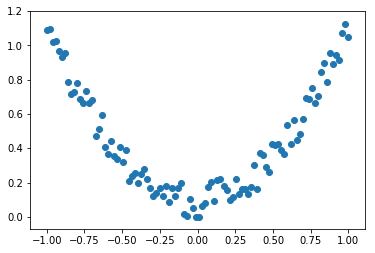

In [15]:
# 建立假的数据集
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim = 1)
y = x.pow(2) + 0.2*torch.rand(x.size())

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())

## 建立神经网络



In [26]:
import torch
import torch.nn.functional as F

class Net(torch.nn.Module):  # 继承torch的module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output) # 输出层线性输出
        
    def forward(self, x): # 这同时也是module种的forward功能
        # 正向传播输入值，神经网络分析出输出值
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
net = Net(n_feature = 1, n_hidden = 20, n_output = 1)
print(net)  # 输出net的结构

    

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)


## 训练网络


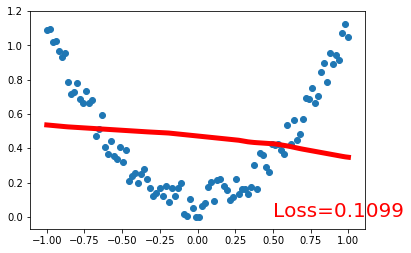

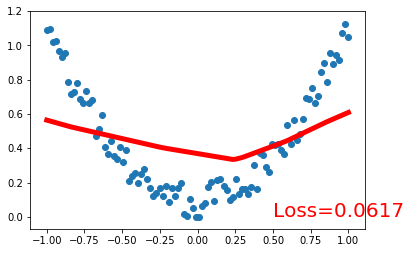

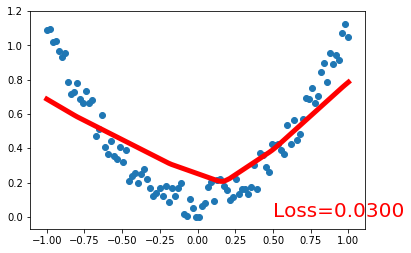

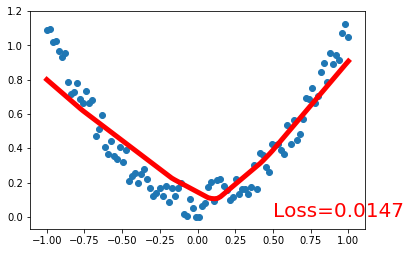

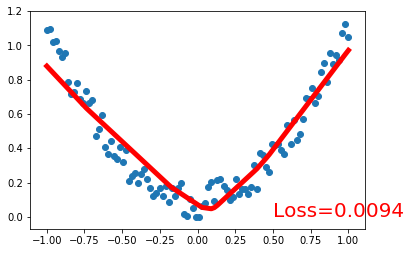

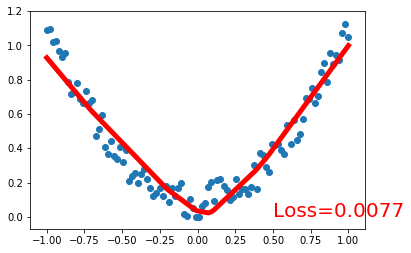

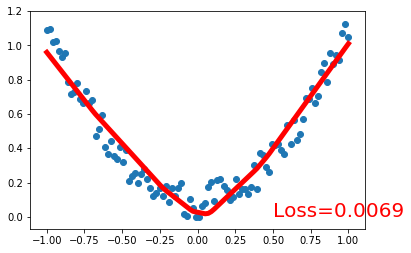

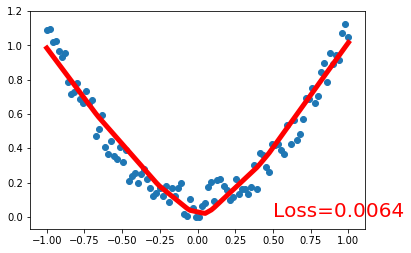

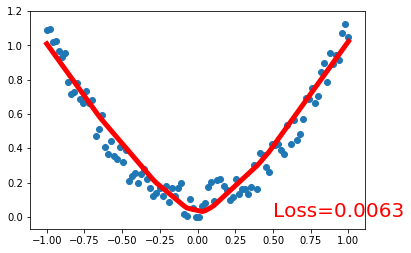

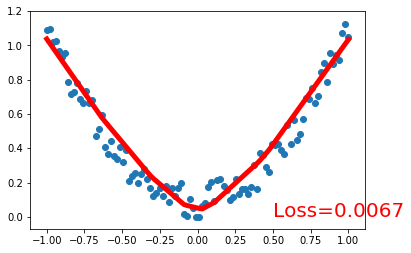

In [27]:
# optimizer 是 训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr = 0.2)# 传入net 的所有参数，学习率
loss_func = torch.nn.MSELoss()
# 预测值和真实值得误差计算公式（均方差）
for t in range(200):
    prediction = net(x)   # 喂给net训练数据x,输出预测值
    
    loss = loss_func(prediction, y) # 计算两者的误差
    optimizer.zero_grad() # 清空上一步的参与更新参数值
    loss.backward() # 误差反向传播，计算参数更新值
    optimizer.step()  # 将参数更新值施加到net的parameters上
    if t % 20 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size':20,'color':'red'})
        plt.pause(0.1)